In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

TRAINING IMAGE PREPROCESSING

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False, 
)  

Found 70295 files belonging to 38 classes.


VALIDATION IMAGE PREPROCESSING

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,   
) 

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[113.   102.   132.  ]
   [114.75 103.75 133.75]
   [116.   105.   135.  ]
   ...
   [ 95.75  86.75 117.75]
   [102.75  93.75 124.75]
   [101.75  92.75 123.75]]

  [[108.25  97.25 127.25]
   [108.    97.   127.  ]
   [108.    97.   127.  ]
   ...
   [102.75  93.75 124.75]
   [ 99.75  90.75 121.75]
   [ 98.    89.   120.  ]]

  [[111.25 100.25 130.25]
   [108.5   97.5  127.5 ]
   [106.75  95.75 125.75]
   ...
   [ 97.    88.   119.  ]
   [ 95.5   86.5  117.5 ]
   [ 99.    90.   121.  ]]

  ...

  [[103.25 121.25 169.25]
   [100.25 118.25 166.25]
   [ 99.5  117.5  165.5 ]
   ...
   [105.75 122.75 166.75]
   [103.25 120.25 164.25]
   [101.25 118.25 162.25]]

  [[100.5  118.5  166.5 ]
   [100.25 118.25 166.25]
   [100.   118.   166.  ]
   ...
   [105.5  122.5  166.5 ]
   [104.75 121.75 165.75]
   [100.   117.   161.  ]]

  [[100.75 118.75 166.75]
   [100.75 118.75 166.75]
   [ 99.5  117.5  165.5 ]
   ...
   [103.75 120.75 164.75]
   [102.   119.   163.  ]
   [102.25 119.25 16

BUILDING MODEL


In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [7]:
model=Sequential() 

In [8]:
## building convolution layer 

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2)) 

c:\Users\surve\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [14]:
model.add(Dropout(0.25)) ## To avoid over fitting

In [15]:
model.add(Flatten()) 

In [16]:
model.add(Dense(units=1500,activation='relu')) 

In [17]:
model.add(Dropout(0.4))

In [18]:
#output layer
model.add(Dense(units=38,activation='softmax')) 

COMPILING MODEL

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [20]:
from tensorflow.keras.optimizers import Adam

# Compile the model with the updated Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINING

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2368s 1s/step - accuracy: 0.4118 - loss: 2.0791 - val_accuracy: 0.8476 - val_loss: 0.4920
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2642s 1s/step - accuracy: 0.8381 - loss: 0.5153 - val_accuracy: 0.9033 - val_loss: 0.3093
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1851s 843ms/step - accuracy: 0.9056 - loss: 0.2875 - val_accuracy: 0.9418 - val_loss: 0.1829
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1852s 843ms/step - accuracy: 0.9396 - loss: 0.1858 - val_accuracy: 0.9542 - val_loss: 0.1445
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2682s 1s/step - accuracy: 0.9543 - loss: 0.1408 - val_accuracy: 0.9566 - val_loss: 0.1334
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2132s 970ms/step - accuracy: 0.9649 - loss: 0.1064 - val_accuracy: 0.9539 - val_loss: 0.1502
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1883s 857ms/step - accuracy: 0.9708 - loss: 0.0888 - val_accuracy: 0.9467 - val_loss: 0.1819
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2068s 941ms/step - acc

### Model Evaluation ###

In [23]:
#Model Evaluation on Training Set 
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 498s 227ms/step - accuracy: 0.9901 - loss: 0.0303


In [24]:
print(train_loss, train_acc)

0.027120791375637054 0.9913507103919983


In [25]:
#Model on Validation Set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 231ms/step - accuracy: 0.9634 - loss: 0.1220


In [26]:
print(val_loss, val_acc)

0.1136685311794281 0.9656840562820435


### Saving Model ###

In [ ]:
model.save("trainig_model.h5")

In [28]:
model.save("taining_model.keras")

In [29]:
training_history.history

{'accuracy': [0.6073831915855408,
  0.8611280918121338,
  0.9167366027832031,
  0.9429120421409607,
  0.9562984704971313,
  0.966356098651886,
  0.9717049598693848,
  0.9776371121406555,
  0.9791308045387268,
  0.9831851720809937],
 'loss': [1.3307982683181763,
  0.4378642439842224,
  0.25572845339775085,
  0.17596440017223358,
  0.13263478875160217,
  0.10154034197330475,
  0.08516246825456619,
  0.07199808955192566,
  0.062257155776023865,
  0.05160069465637207],
 'val_accuracy': [0.8475984334945679,
  0.9032551646232605,
  0.9418392777442932,
  0.9541884660720825,
  0.9565786719322205,
  0.9539039134979248,
  0.9466765522956848,
  0.9645458459854126,
  0.9437741637229919,
  0.9656840562820435],
 'val_loss': [0.4919610321521759,
  0.30932843685150146,
  0.18289761245250702,
  0.1444505900144577,
  0.13342440128326416,
  0.150207981467247,
  0.18192237615585327,
  0.11399473994970322,
  0.20570677518844604,
  0.11366845667362213]}

In [30]:
#Recording history in json
import json
with open("training_hist.json", "w") as f:
    json.dump("training_history.history", f)

In [31]:
training_history.history['accuracy']

[0.6073831915855408,
 0.8611280918121338,
 0.9167366027832031,
 0.9429120421409607,
 0.9562984704971313,
 0.966356098651886,
 0.9717049598693848,
 0.9776371121406555,
 0.9791308045387268,
 0.9831851720809937]

In [32]:
training_history.history['val_accuracy']

[0.8475984334945679,
 0.9032551646232605,
 0.9418392777442932,
 0.9541884660720825,
 0.9565786719322205,
 0.9539039134979248,
 0.9466765522956848,
 0.9645458459854126,
 0.9437741637229919,
 0.9656840562820435]

### Accuracy Visulization ###

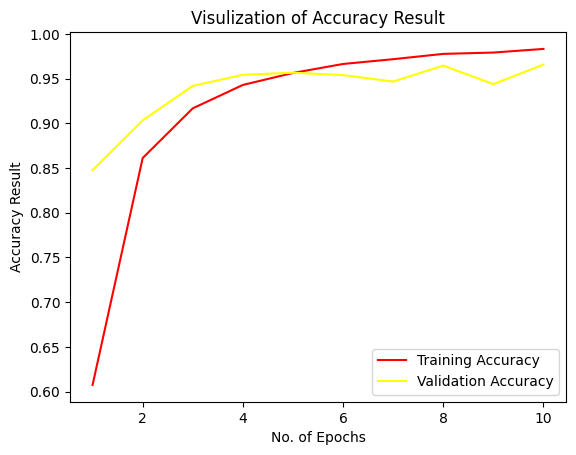

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='yellow', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for other evaluation ###

In [34]:
class_name  = validation_set.class_names 
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,  
)

Found 17572 files belonging to 38 classes.


In [36]:
Y_pred = model.predict(test_set)
Y_pred, Y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 116s 211ms/step


(array([[9.9999177e-01, 6.1334540e-06, 5.4880811e-08, ..., 1.7021730e-11,
         3.7264074e-11, 1.0463433e-10],
        [8.5482377e-01, 1.4254510e-01, 1.2360225e-05, ..., 9.0728260e-09,
         1.2557151e-08, 4.8539562e-08],
        [9.9999952e-01, 4.7480378e-07, 1.5493587e-11, ..., 2.2364306e-16,
         4.7822945e-14, 9.7700006e-13],
        ...,
        [1.4590627e-11, 1.1694444e-14, 1.1583345e-09, ..., 2.1360049e-12,
         9.2531363e-14, 9.9999976e-01],
        [9.0443729e-11, 1.2198776e-13, 9.3419352e-09, ..., 2.2486488e-11,
         2.9251692e-12, 9.9999988e-01],
        [3.1693388e-14, 1.9194195e-16, 4.7258872e-14, ..., 1.0409434e-14,
         1.3122459e-11, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [37]:
predicted_categories = tf.argmax(Y_pred,axis=1)

In [38]:
predicted_categories 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x, y in test_set],axis=0)
true_categories 

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
pip install scikit-learn

                                              0.0/11.0 MB ? eta -:--:--
                                             0.0/11.0 MB 960.0 kB/s eta 0:00:12
                                              0.1/11.0 MB 1.1 MB/s eta 0:00:11
                                              0.2/11.0 MB 1.5 MB/s eta 0:00:08
     -                                        0.3/11.0 MB 1.8 MB/s eta 0:00:06
     -                                        0.5/11.0 MB 2.1 MB/s eta 0:00:05
     --                                       0.7/11.0 MB 2.5 MB/s eta 0:00:05
     ---                                      1.0/11.0 MB 2.9 MB/s eta 0:00:04
     ----                                     1.2/11.0 MB 3.2 MB/s eta 0:00:04
     -----                                    1.4/11.0 MB 3.4 MB/s eta 0:00:03
     ------                                   1.7/11.0 MB 3.6 MB/s eta 0:00:03
     -------                                  2.0/11.0 MB 3.8 MB/s eta 0:00:03
     --------                                 2.2/11.0 MB 


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.94      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.97      0.94      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.98      0.

In [46]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visulization ###

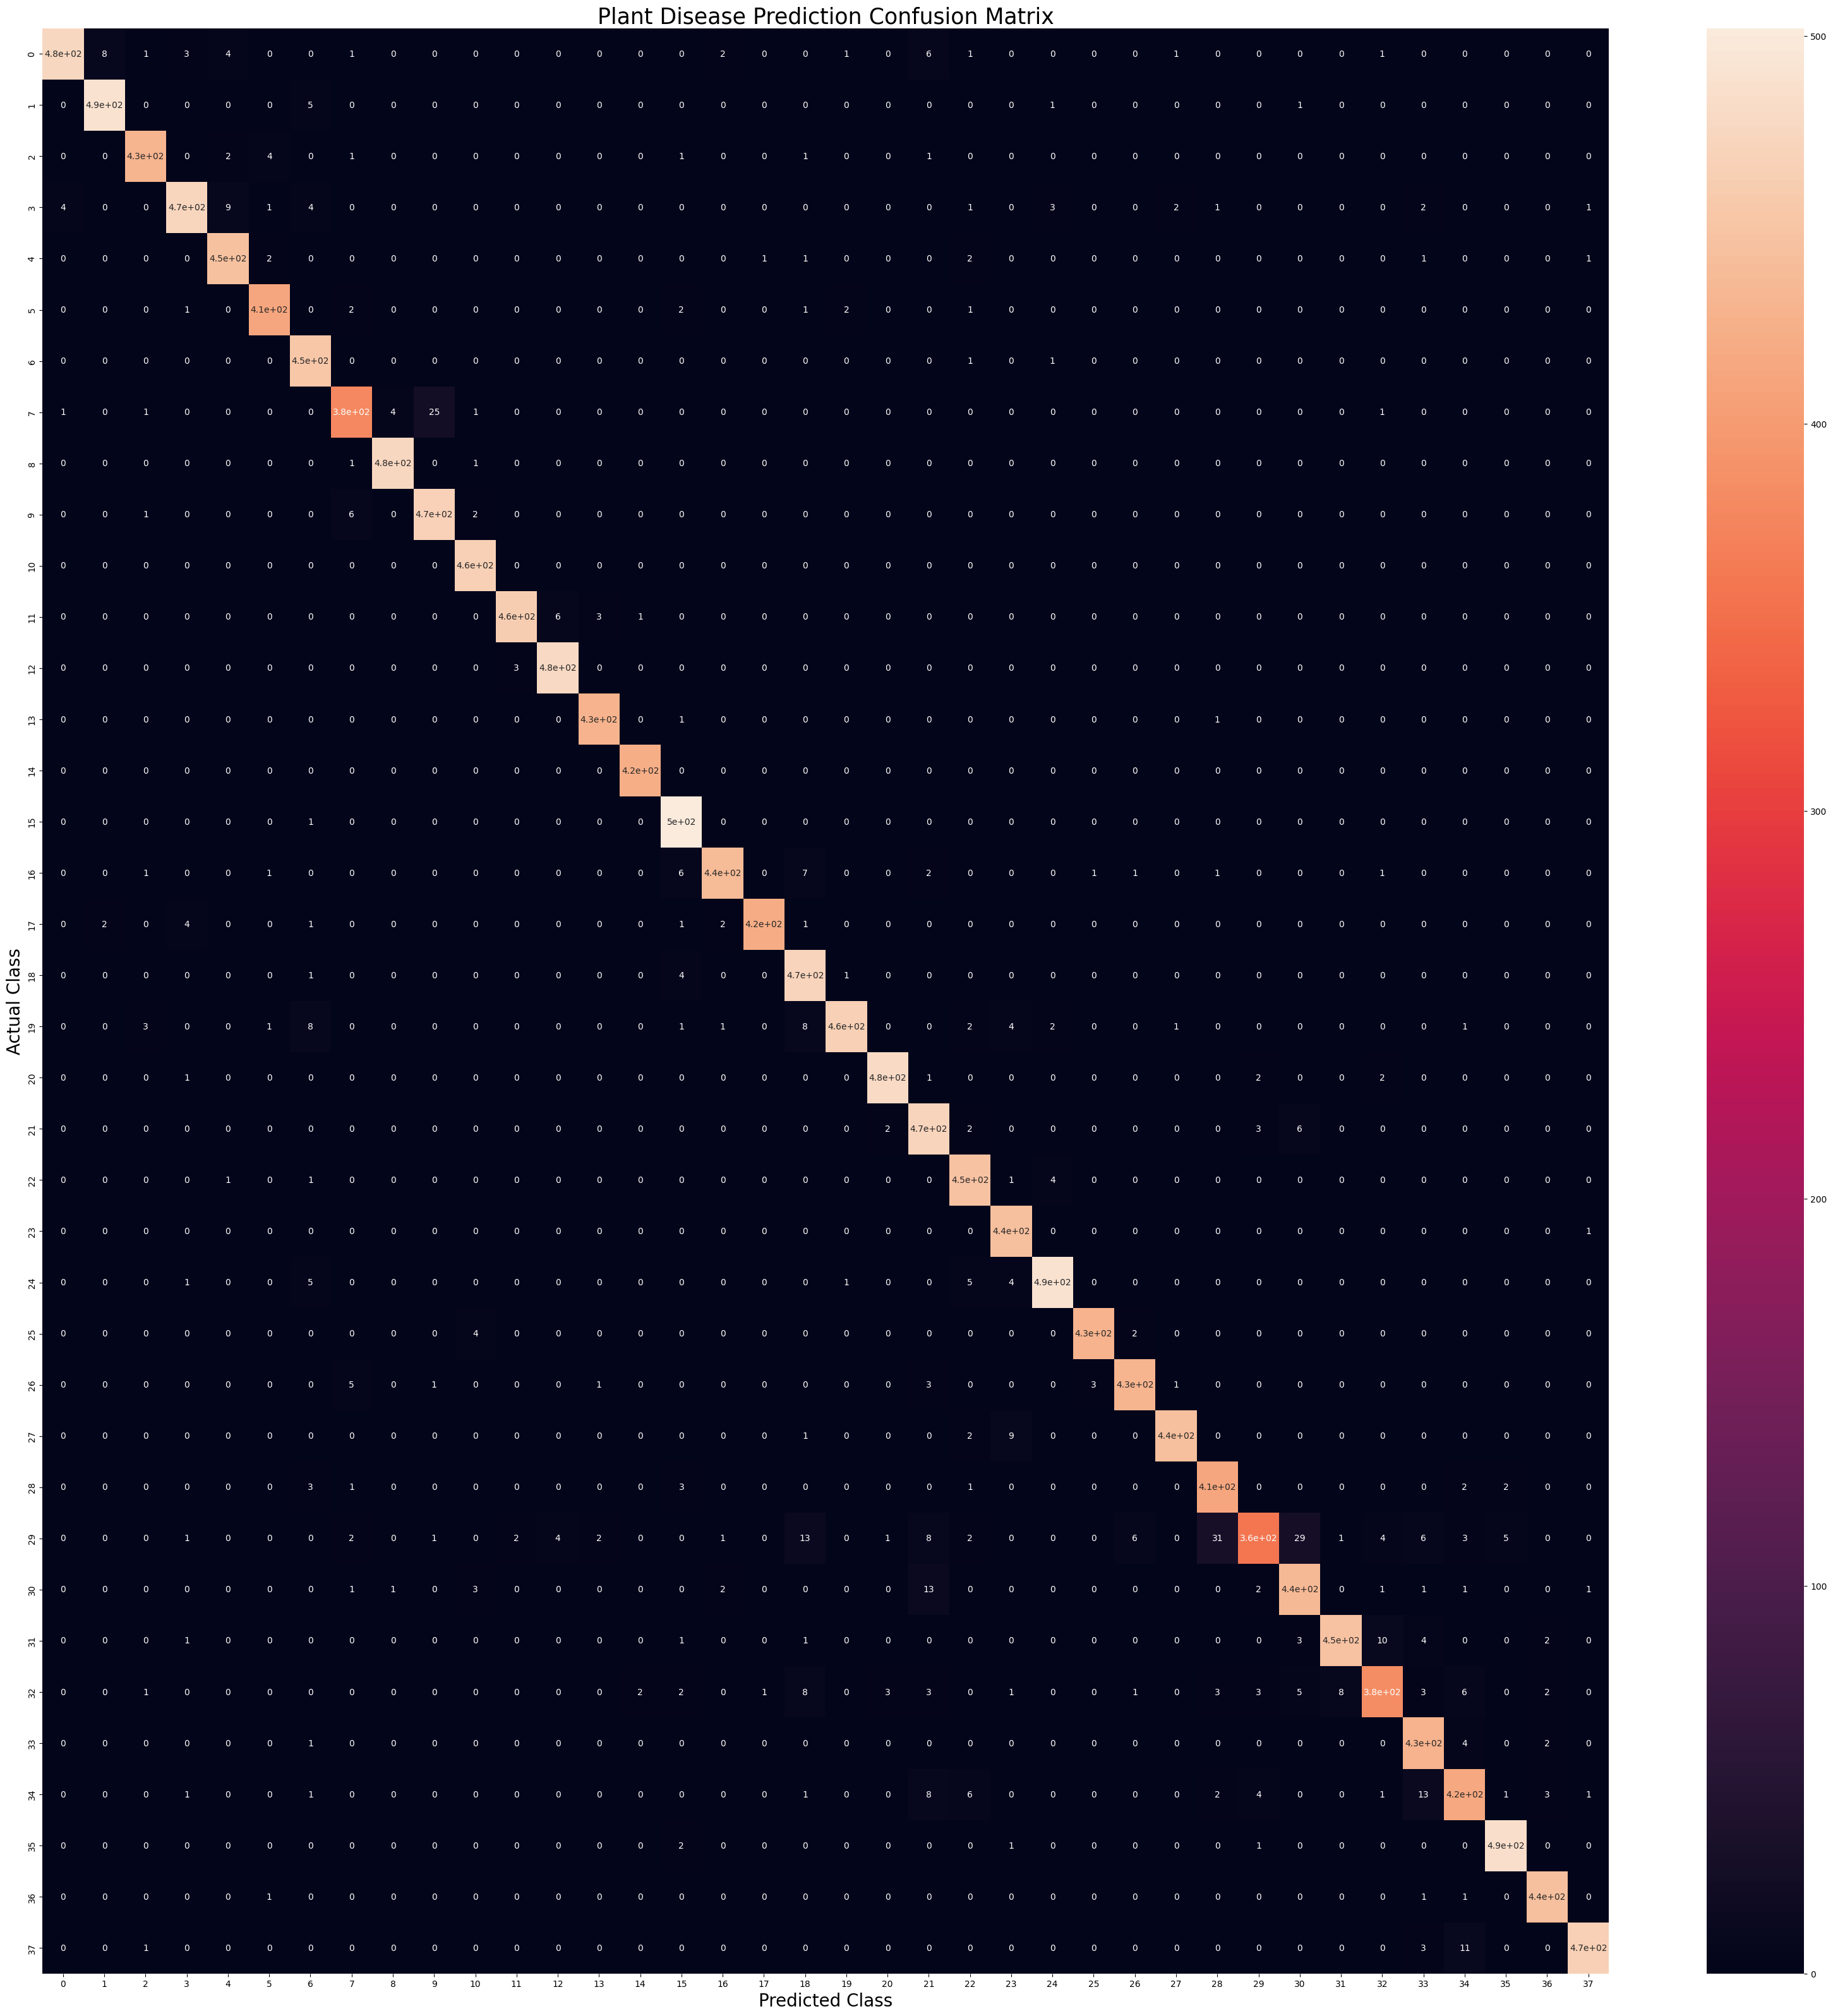

In [47]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()